<a href="https://colab.research.google.com/github/hemoabdullah/PCVK_smst5/blob/main/Week3_Hammam_Abdullah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practicum

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
import math

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-1920622359.py:16: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


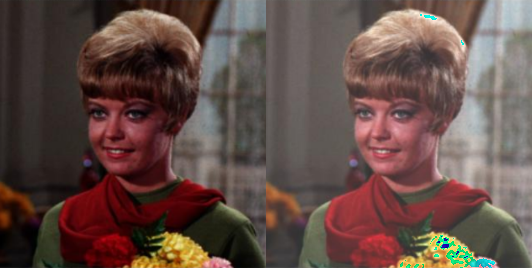

In [5]:

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
brightness_image = np.zeros(original. shape, original.dtype)


#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)
#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs (original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Practicum Task

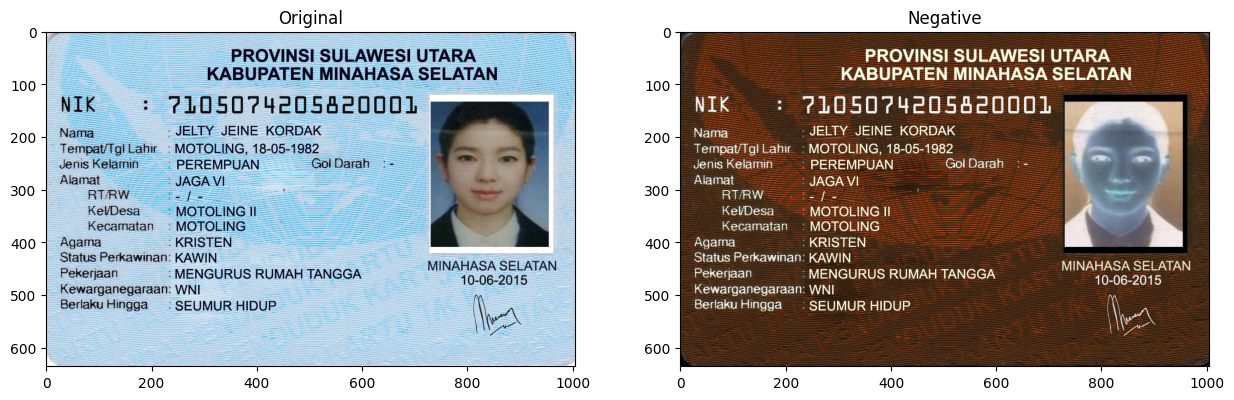

In [7]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/Image/ktp.jpg')
ktp = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
ktporg = ktp.copy()


ktp = 255 - ktp

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(ktporg)

plt.subplot(2,2,2)
plt.title('Negative')
plt.imshow(ktp)

plt.tight_layout
plt.show()

Enter a contrast: 50
Enter a brightness: 2


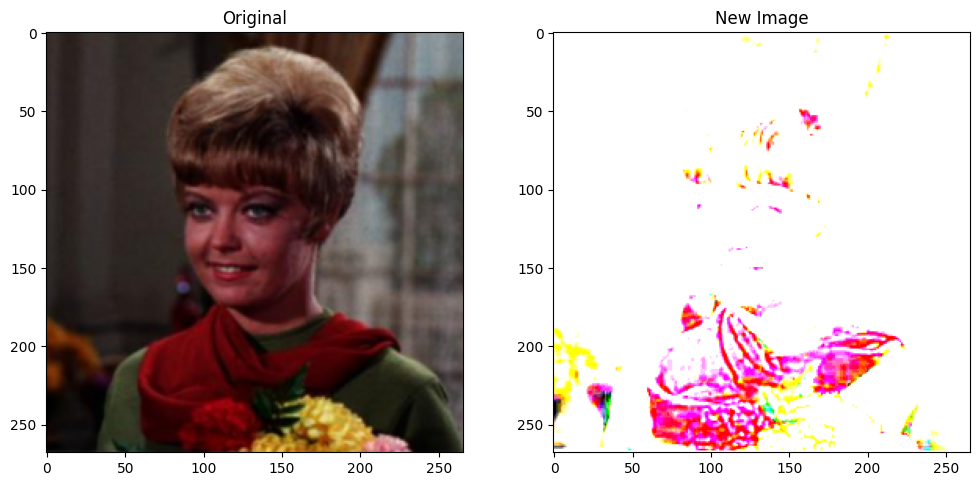

In [8]:
og2 = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
ogog2 = og2.copy()


try :
  contrast = float(input('Enter a contrast: '))
  brightness = int(input('Enter a brightness: '))
except ValueError:
  print('Error, not a number')

for y in range(og2.shape[0]):
  for x in range(og2.shape[1]):
    for c in range(og2.shape[2]):
      newimg = contrast * og2[y,x,c] + brightness
      og2[y,x,c] = np.clip  (newimg, 0, 255 )


plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(cv.cvtColor(ogog2, cv.COLOR_BGR2RGB))

plt.subplot(2,2,2)
plt.title('New Image')
plt.imshow(cv.cvtColor(og2, cv.COLOR_BGR2RGB))

plt.tight_layout
plt.show()

Masukkan nilai kecerahan: 50


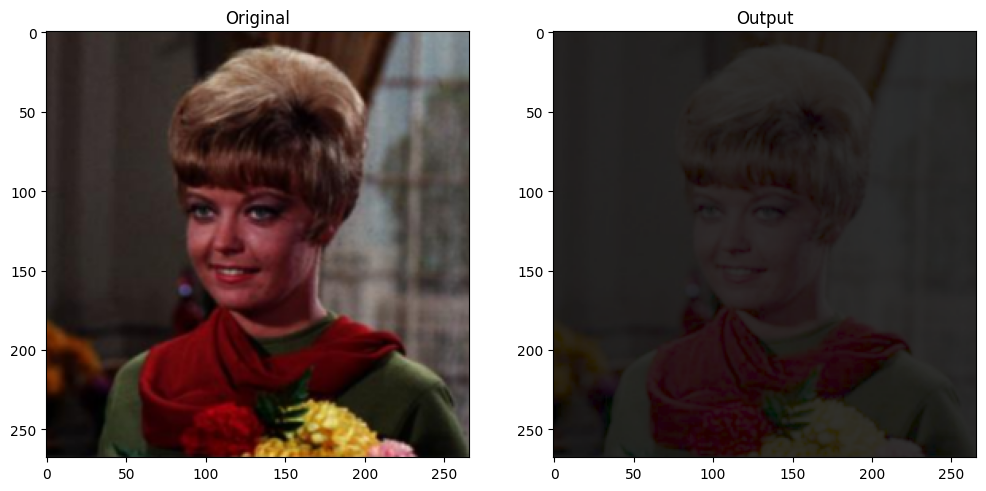

In [13]:
og4 = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
og4f = og4.copy().astype('float')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')
    brightness = 50

c = brightness / np.log(1 + np.max(og4f))

log_transformed = c * np.log(1 + og4f)
log_transformed = np.uint8(np.clip(log_transformed, 0, 255))

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(cv.cvtColor(og4, cv.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title('Output')
plt.imshow(cv.cvtColor(log_transformed, cv.COLOR_BGR2RGB))

plt.show()


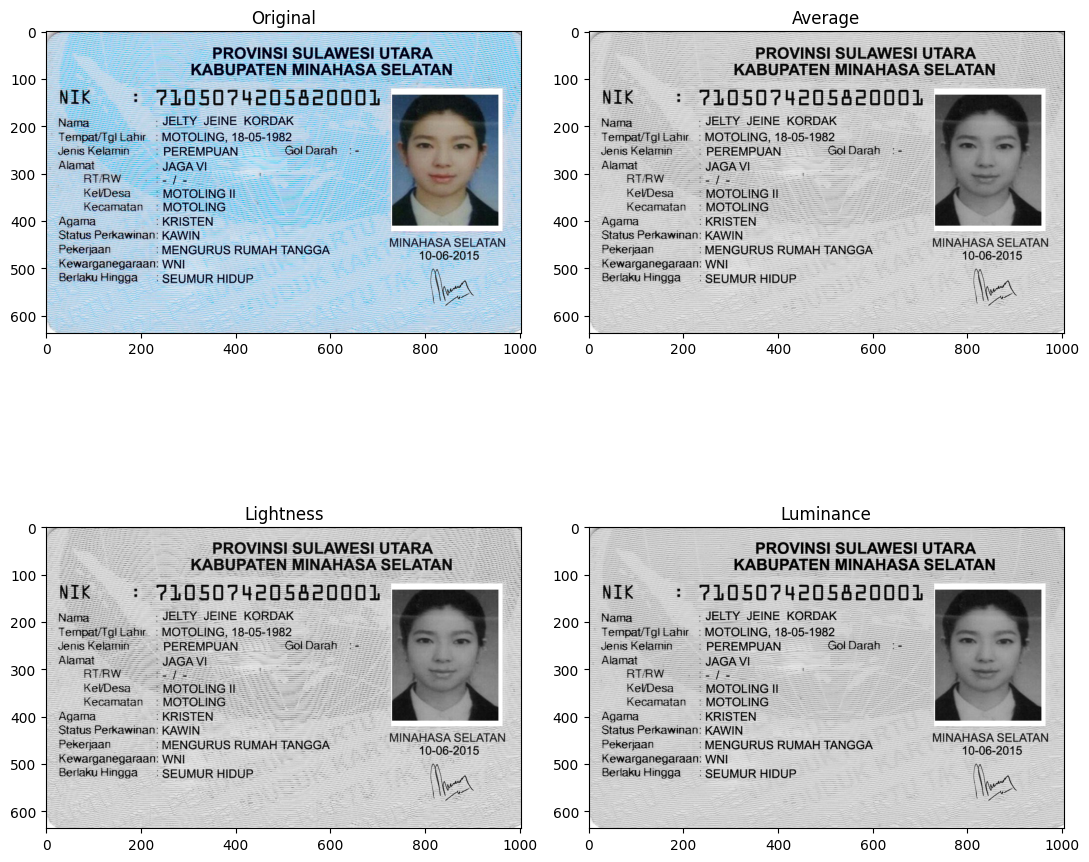

In [14]:
og5 = cv.imread('/content/drive/MyDrive/PCVK/Image/ktp.jpg')

og5gaver = np.zeros(og5.shape, og5.dtype)
og5gliver = np.zeros(og5.shape, og5.dtype)
og5gluver = np.zeros(og5.shape, og5.dtype)


for y in range(og5.shape[0]):
  for x in range(og5.shape[1]):
    b, g, r = og5[y, x]
    grayavg = (int(b) + int(g) + int(r)) / 3
    graylight = (int(max(b, g, r)) + int(min(b, g, r))) / 2
    graylum = 0.21 * r + 0.72 * g + 0.07 * b

    og5gaver[y, x] = [grayavg, grayavg, grayavg]
    og5gliver[y, x] = [graylight, graylight, graylight]
    og5gluver[y, x] = [graylum, graylum, graylum]

plt.figure(figsize=(11, 11))

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(og5, cv.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(og5gaver, cv.COLOR_BGR2RGB))
plt.title("Average")

plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(og5gliver, cv.COLOR_BGR2RGB))
plt.title("Lightness")

plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(og5gluver, cv.COLOR_BGR2RGB))
plt.title("Luminance")

plt.tight_layout()
plt.show()

# D2 Practicum

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 40


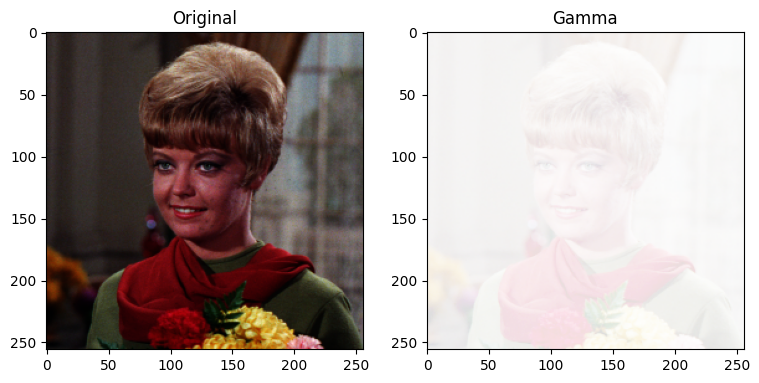

In [ ]:
og6 = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
og6 = cv.cvtColor(og6, cv.COLOR_BGR2RGB)
og6f = og6.copy().astype('float')

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')




for y in range(og6f.shape[0]):
  for x in range(og6f.shape[1]):
    for z in range(og6f.shape[2]):
      gammaorg = og6f[y,x,z]
      output = 255 * (gammaorg / 255) ** (1 / gamma)
      og6f[y,x,z] = np.clip(output, 0, 255)

finalres = np.array(og6f, dtype='uint8')

plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(og6)


plt.subplot(1,2,2)
plt.title('Gamma')
plt.imshow(finalres)



plt.tight_layout
plt.show()

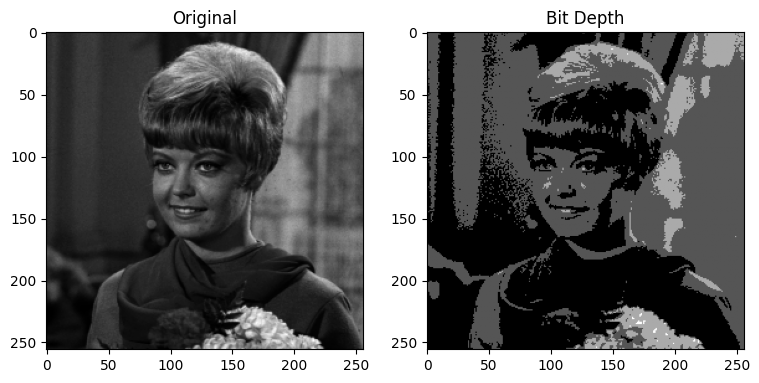

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff', cv.IMREAD_GRAYSCALE)

outimg = original.copy()


for y in range (original.shape[0]):
  for x in range (original.shape[1]):
    orgpix = original[y,x]
    newimg = round(original[y,x] / level) * level
    outimg[y,x] = newimg


plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(original, cmap='grey')

plt.subplot(1,2,2)
plt.title('Bit Depth')
plt.imshow(outimg, cmap='grey')

plt.tight_layout
plt.show()

Enter the amount of image to average
Images:100

Result of averaging 100 images:


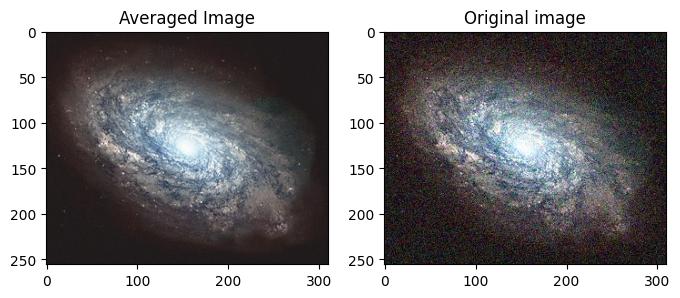

PSNR value is 28.918061430833827 dB


In [ ]:
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr

cv_img = []
image = glob.glob('/content/drive/MyDrive/PCVK/noise/*.jpg')

print("Enter the amount of image to average")
try:
  avginp = int(input("Images:"))
except ValueError:
  print("Invalid value")

first_image = cv.imread(image[0])
empty_canvas = np.zeros(first_image.shape, dtype=np.float64)


for i in range(avginp):
  path = image[i]
  img = cv.imread(path)
  empty_canvas += img.astype(np.float64)

if avginp > 0:
    averaged_image = empty_canvas / avginp
else:
    averaged_image = empty_canvas


final_image = np.array(averaged_image, dtype=np.uint8)

print(f"\nResult of averaging {avginp} images:")
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.title('Averaged Image')
plt.imshow(final_image)

plt.subplot(1,2,2)
plt.title('Original image')
plt.imshow(first_image)

plt.tight_layout
plt.show()

PSNR_value = PSNR(first_image, final_image)
print(f"PSNR value is {PSNR_value} dB")

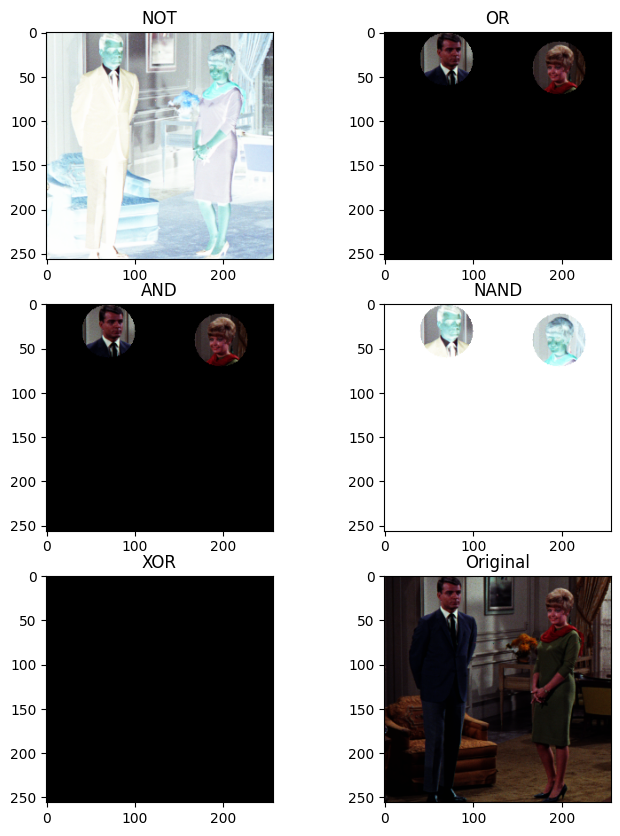

In [ ]:
img_couple = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Image/couple.tiff'), cv.COLOR_BGR2RGB)

canvas = np.zeros((img_couple.shape[0], img_couple.shape[1]), dtype=np.uint8)

cv.circle(canvas, center=(70,30), radius=30, color=(255,255,255), thickness=-1)
cv.circle(canvas, center=(197,40), radius=30, color=(255,255,255), thickness=-1)

result = cv.bitwise_not(img_couple)
result2 = cv.bitwise_or(img_couple, img_couple,mask = canvas)
result3 = cv.bitwise_and(img_couple, img_couple,mask = canvas)
result4 = cv.bitwise_not(result3)
result5 = cv.bitwise_xor(img_couple, img_couple,mask = canvas)

plt.figure(figsize=(8,10))
plt.subplot(3,2,1)
plt.title('NOT')
plt.imshow(result)

plt.subplot(3,2,2)
plt.title('OR')
plt.imshow(result2)

plt.subplot(3,2,3)
plt.title('AND')
plt.imshow(result3)

plt.subplot(3,2,4)
plt.title('NAND')
plt.imshow(result4)

plt.subplot(3,2,5)
plt.title('XOR')
plt.imshow(result5)

plt.subplot(3,2,6)
plt.title('Original')
plt.imshow(img_couple)

plt.tight_layout
plt.show()